Nolearn Tutorial (toy example: regression)
====
본 튜토리얼은 [다음 lasagne 예제](https://github.com/craffel/Lasagne-tutorial/blob/master/examples/tutorial.ipynb) 문서와 [다음 nolearn 예제](http://nbviewer.ipython.org/github/dnouri/nolearn/blob/master/docs/notebooks/CNN_tutorial.ipynb)를 기반으로 작성되었으며, 최신(2015년 09월 04일)의 master branch에서 동작하도록 수정되었음.
(내용이해를 돕기위해 간략하게 번역 및 각색하여 오역이나 오류가 있을 수 있음.)

## Toy example (regression)
* 다음은 2차원의 input을 가지고 output을 추정하는 함수 f(x)를 찾는 예제 이다.

### 예제 데이터 생성
* 2차원 데이터 1000개를 생성한다.

In [1]:
import theano
import sklearn.datasets
N_FEATURE_DIMS=2
X, y = sklearn.datasets.make_regression(n_samples=1000, n_features=N_FEATURE_DIMS, noise=1)
X[:, 0] = -X[:, 0]

# Convert to theano floatX
X = X.astype(theano.config.floatX)
y = y.astype('float32')
y = (y-y.min())/y.max()

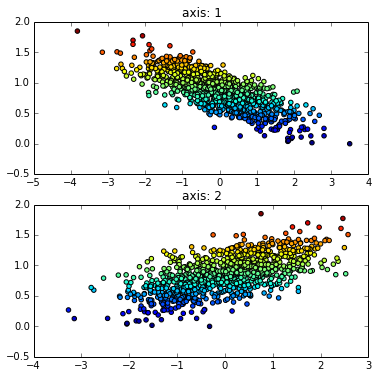

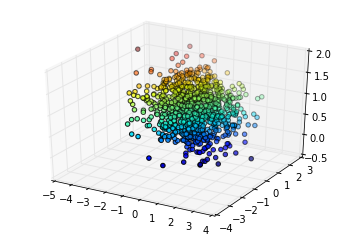

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

figs, axes = plt.subplots(N_FEATURE_DIMS, 1, figsize=(6, 3*N_FEATURE_DIMS))
for i in range(N_FEATURE_DIMS):
    axes[i].scatter(X[:, i], y, c=y)
    axes[i].set_title('axis: {}'.format(i+1))
    
if N_FEATURE_DIMS >= 2:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], y, c=y)

### layers
lasagne는 일반적으로 Layer인스턴스를 쌓아서 네트워크를 만든다. lasagne의 Layer는 neural network에서 일반적으로 사용되는 기능을을 구현해 놓았고, layer에 있는 파라메터는 Theano를 사용해 계산한다.

#### InputLayer
InputLayer는 실제 입력 데이터(observed data)를 넣을 수 있는 레이어이다.

#### DenseLayer
DenseLayers는 neural network의 기본 형태의 Layer이다.
인풋값인 $x$ 에 웨이트 매트릭스 $W$ 와 바이어스 벡터 $b$ 를 연산하고 nonlinearity 함수인 $\\sigma$ 를 수행한다. ($\\sigma(Wx + b)$)
> fullconnect layer라고도 한다.

![](http://www.omicsonline.org/JHMIimages/2157-7420-3-112-g001.gif)


In [3]:
from lasagne.layers import *
from lasagne.nonlinearities import *
layers = [
    (InputLayer, {'shape': X.shape}),
    (DenseLayer, {'num_units': 10, 'nonlinearity': identity} ),
    (DenseLayer, {'num_units': 1, 'nonlinearity': identity} ),
]

### NeuralNet
* regression을 위한 Network & parameter 셋업

In [4]:
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit
from lasagne.objectives import *
from lasagne.updates import *


net = NeuralNet(
    layers=layers,
    regression=True,

    train_split=TrainSplit(eval_size=0.1),
    max_epochs = 3,
    
    update=sgd,
    update_learning_rate=0.01,
    
    verbose=1,
)

#### training

In [5]:
_ = net.fit(X, y)

# Neural Network with 41 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input0       2
  1  dense1      10
  2  dense2       1

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.94968       0.57024      1.66541  0.00s
      2       0.33105       0.20888      1.58492  0.00s
      3       0.11985       0.07667      1.56319  0.00s


##### loss
![error or loss](http://ci.columbia.edu/ci/premba_test/c0331/images/s7/5703903823.gif)

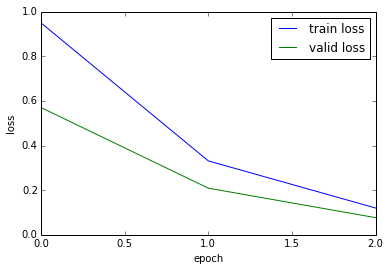

In [6]:
from nolearn.lasagne.visualize import plot_loss
plot_loss(net)

#### evaluation

In [7]:
y_hat = net.predict(X)

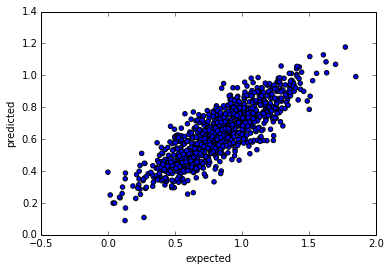

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y, y_hat)
plt.xlabel('expected')
plt.ylabel('predicted')

#### training (update)

      4       0.04365       0.02792      1.56314  0.00s
      5       0.01592       0.01010      1.57628  0.00s
      6       0.00585       0.00365      1.60129  0.00s


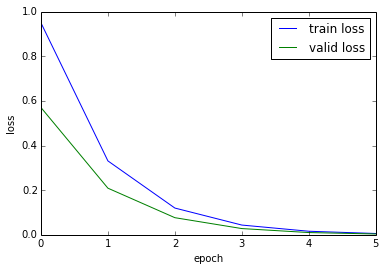

In [9]:
_ = net.fit(X, y)
plot_loss(net)

##### optimization
![optimization](https://miniopt.files.wordpress.com/2015/01/gradient_descent-svg.png?w=360)


#### training (update)

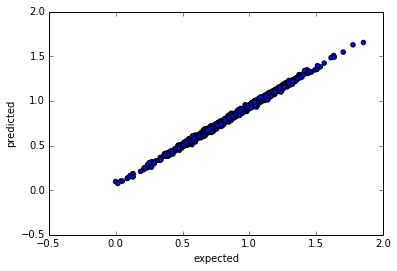

In [10]:
y_hat = net.predict(X)

plt.scatter(y, y_hat)
plt.xlabel('expected')
plt.ylabel('predicted')

# Input Scale

In [11]:
import theano
import sklearn.datasets
N_FEATURE_DIMS=2
X, y = sklearn.datasets.make_regression(n_samples=1000, n_features=N_FEATURE_DIMS, noise=1)
X[:, 0] = -X[:, 0]
X[:, 0] *= 10

# Convert to theano floatX
X = X.astype(theano.config.floatX)
y = y.astype('float32')
y = (y-y.min())/y.max()

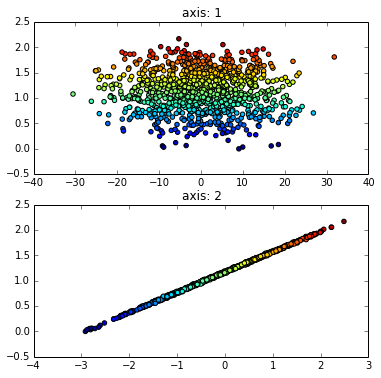

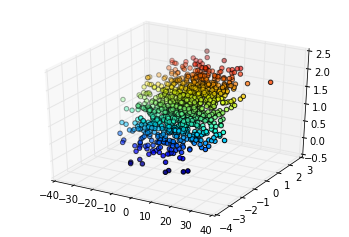

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

figs, axes = plt.subplots(N_FEATURE_DIMS, 1, figsize=(6, 3*N_FEATURE_DIMS))
for i in range(N_FEATURE_DIMS):
    axes[i].scatter(X[:, i], y, c=y)
    axes[i].set_title('axis: {}'.format(i+1))
    
if N_FEATURE_DIMS >= 2:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], y, c=y)

In [13]:
from lasagne.layers import *
from lasagne.nonlinearities import *
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit
from lasagne.objectives import *
from lasagne.updates import *

layers = [
    (InputLayer, {'shape': X.shape}),
    (DenseLayer, {'num_units': 10, 'nonlinearity': tanh} ),
    (DenseLayer, {'num_units': 1, 'nonlinearity': identity} ),
]
net = NeuralNet(
    layers=layers,
    regression=True,

    train_split=TrainSplit(eval_size=0.1),
    max_epochs = 100,
    
    update=sgd,
    update_learning_rate=0.01,
    
    verbose=0,
)

In [14]:
_ = net.fit(X, y)

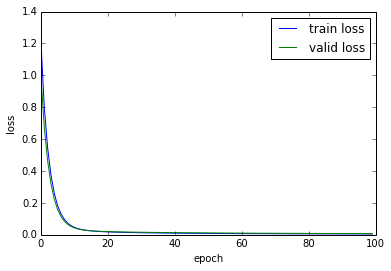

In [15]:
from nolearn.lasagne.visualize import plot_loss
plot_loss(net)

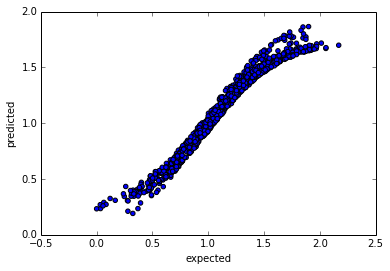

In [16]:
y_hat = net.predict(X)

plt.scatter(y, y_hat)
plt.xlabel('expected')
plt.ylabel('predicted')